In [1]:
import os
import numpy as np

import analysis_utils as utils

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cohort = 'cohort_2_v2'
to_analyze = 'full_clean'
data_dir = '/Users/rebekahzhang/Documents/shuler_lab/behavior_data'
data_folder = os.path.join(data_dir, cohort, to_analyze)
print(data_folder)

/Users/rebekahzhang/Documents/shuler_lab/behavior_data/cohort_2_v2/full_clean


## load session log

In [3]:
training_session_log = utils.load_session_log(data_folder, 'training_sessions.csv')

make mouse list

In [4]:
mouse_list = utils.generate_mouse_list(training_session_log)

['RZ012', 'RZ013', 'RZ015', 'RZ016', 'RZ017']


In [64]:
def calculate_time_by_wait(group):
    wait_start_time = group.loc[(group['key'] == 'wait') & (group['value'] == 1), 'trial_time'].iloc[0]
    group['time_by_wait_start'] = group['trial_time'] - wait_start_time
    return group

In [77]:
def calculate_time_waited(group):
    wait_start_time = group.loc[(group['key'] == 'wait') & (group['value'] == 1), 'trial_time'].iloc[0]
    if 'consumption' in group.key.unique():
        consump_start_time = group.loc[(group['key'] == 'consumption') & (group['value'] == 1), 'trial_time'].iloc[0]
        time_waited = consump_start_time - wait_start_time
    else:
        time_waited = np.nan
    group['time_waited'] = time_waited
    return group

In [127]:
dir_name = training_session_log.dir[1]
file_name = training_session_log.filename[1]
processed_session = utils.load_processed_session(data_folder, dir_name, file_name)
all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)

In [128]:
processed_session

,session_time,block_num,session_trial_num,block_trial_num,state,time_bg,reward_size,value,key,trial_time
2,1.685640e+09,0.0,0.0,0.0,None,3.5,NaN,1,trial,0.000000
3,1.685640e+09,0.0,0.0,0.0,in_background,3.5,NaN,1,background,0.000084
4,1.685640e+09,0.0,0.0,0.0,in_background,NaN,NaN,1,visual,0.007220
5,1.685640e+09,0.0,0.0,0.0,in_background,NaN,NaN,1,lick,0.076821
6,1.685640e+09,0.0,0.0,0.0,in_background,NaN,NaN,0,lick,0.148685
...,...,...,...,...,...,...,...,...,...,...
22229,1.685642e+09,1.0,321.0,158.0,in_background,1.0,NaN,1,background,0.000090
22230,1.685642e+09,1.0,321.0,158.0,in_background,NaN,NaN,1,visual,0.007159
22231,1.685642e+09,1.0,321.0,158.0,in_background,NaN,NaN,0,visual,1.007125
22232,1.685642e+09,1.0,321.0,158.0,in_background,1.0,NaN,1,wait,1.007260


In [153]:
all_trials = all_trials[all_trials['num_consumption_lick'].notna()]
# some trials has no pump, could add pump count to all_trials... not sure how best to deal with it yet

In [154]:
all_trials_by_tw = all_trials.sort_values(by=['time_waited'])

In [155]:
all_trials_by_tw

,session_trial_num,block_trial_num,block_num,start_time,end_time,bg_drawn,blk_type,bg_length,miss_trial,good_trial,time_waited,reward,num_consumption_lick
149,149.0,149.0,0.0,1.685641e+09,1.685641e+09,3.4,l,3.406639,False,False,0.000786,0.001694,5.0
118,118.0,118.0,0.0,1.685641e+09,1.685641e+09,3.1,l,3.107121,False,False,0.002559,0.005289,5.0
175,175.0,12.0,1.0,1.685642e+09,1.685642e+09,1.1,s,1.107080,False,False,0.007060,0.014205,1.0
247,247.0,84.0,1.0,1.685642e+09,1.685642e+09,1.2,s,1.207054,False,False,0.008482,0.017053,2.0
136,136.0,136.0,0.0,1.685641e+09,1.685641e+09,2.9,l,2.906767,False,False,0.012691,0.025471,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309.0,146.0,1.0,1.685642e+09,1.685642e+09,1.1,s,1.106820,False,True,4.879733,5.991076,20.0
298,298.0,135.0,1.0,1.685642e+09,1.685642e+09,1.2,s,1.207078,False,True,5.110407,6.131210,20.0
144,144.0,144.0,0.0,1.685641e+09,1.685641e+09,2.5,l,2.506591,False,True,5.130109,6.142728,21.0
246,246.0,83.0,1.0,1.685642e+09,1.685642e+09,0.8,s,0.806530,False,True,5.460440,6.325809,21.0


In [156]:
trial_num_by_tw = all_trials_by_tw.session_trial_num.tolist()

In [157]:
processed_session = processed_session.groupby('session_trial_num', group_keys=True).apply(calculate_time_by_wait)
processed_session = processed_session.reset_index(drop=True)
# processed_session = processed_session.groupby('session_trial_num', group_keys=True).apply(calculate_time_waited)
# processed_session = processed_session.reset_index(drop=True)

In [158]:
licks = processed_session.loc[(processed_session['key'] == 'lick') & (processed_session['value'] == 1)].groupby('session_trial_num')
pumps = processed_session.loc[(processed_session['key'] == 'pump') & (processed_session['value'] == 1)].groupby('session_trial_num')

In [167]:
tw_mean = all_trials.time_waited.mean()

In [168]:
tw_mean

1.4203729206156508

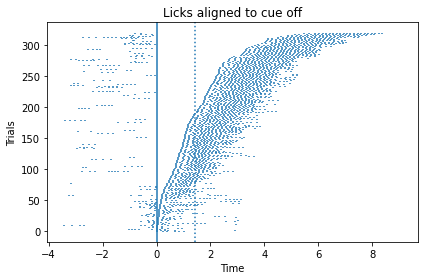

In [171]:
plt.figure()
for i, t in enumerate(trial_num_by_tw):
    time_by_wait_start = licks.get_group(t).time_by_wait_start.tolist()
    plt.eventplot(time_by_wait_start, lineoffsets=i)
plt.axvline(x=0)
plt.axvline(x=tw_mean, linestyle='dotted')
plt.xlabel('Time')
plt.ylabel('Trials')
plt.title('Licks aligned to cue off')
plt.tight_layout()
plt.show()

In [145]:
test = licks.get_group(99).time_by_wait_start.tolist()
len(test)

13

In [148]:
for t in trial_num_by_tw:
    try:
        test = licks.get_group(t).time_by_wait_start.tolist()
        print
    except:
        continue

In [149]:
for t in trial_num_by_tw:
    print(t)

149.0
118.0
175.0
247.0
136.0
109.0
33.0
160.0
291.0
0.0
41.0
30.0
100.0
128.0
42.0
89.0
20.0
90.0
35.0
200.0
1.0
186.0
104.0
77.0
66.0
263.0
242.0
262.0
292.0
111.0
131.0
11.0
237.0
51.0
25.0
183.0
10.0
146.0
5.0
71.0
8.0
57.0
87.0
141.0
185.0
14.0
49.0
210.0
45.0
286.0
97.0
125.0
96.0
150.0
304.0
243.0
40.0
88.0
4.0
122.0
26.0
236.0
140.0
311.0
179.0
19.0
63.0
201.0
7.0
50.0
44.0
195.0
17.0
129.0
101.0
287.0
80.0
48.0
110.0
312.0
264.0
182.0
229.0
151.0
148.0
115.0
82.0
209.0
196.0
297.0
167.0
39.0
117.0
28.0
76.0
187.0
2.0
121.0
165.0
13.0
317.0
79.0
60.0
145.0
81.0
124.0
68.0
91.0
86.0
55.0
166.0
38.0
205.0
93.0
62.0
127.0
34.0
56.0
257.0
276.0
233.0
23.0
106.0
203.0
303.0
138.0
212.0
152.0
67.0
279.0
164.0
174.0
73.0
108.0
119.0
85.0
155.0
139.0
248.0
314.0
31.0
230.0
255.0
238.0
159.0
153.0
261.0
204.0
130.0
61.0
120.0
300.0
240.0
123.0
75.0
258.0
16.0
190.0
52.0
223.0
178.0
158.0
235.0
194.0
234.0
70.0
142.0
268.0
288.0
232.0
277.0
206.0
293.0
197.0
305.0
3.0
99.0
171.0
253.0
10

In [141]:
for t in trial_num_by_tw:
    try:
        group = licks.get_group(t)
    except:
        pass

In [160]:
for t in trial_num_by_tw:
    trial_licks = licks.get_group(t)
    if len(trial_licks) > 0:
        continue
    else:
        print(t)

In [137]:
processed_session.loc[processed_session.session_trial_num == 321]

,session_time,block_num,session_trial_num,block_trial_num,state,time_bg,reward_size,value,key,trial_time,time_by_wait_start
22226,1.685642e+09,1.0,321.0,158.0,trial_transition,1.0,NaN,1,trial,0.000000,-1.007260
22227,1.685642e+09,1.0,321.0,158.0,in_background,1.0,NaN,1,background,0.000090,-1.007170
22228,1.685642e+09,1.0,321.0,158.0,in_background,NaN,NaN,1,visual,0.007159,-1.000102
22229,1.685642e+09,1.0,321.0,158.0,in_background,NaN,NaN,0,visual,1.007125,-0.000135
22230,1.685642e+09,1.0,321.0,158.0,in_background,1.0,NaN,1,wait,1.007260,0.000000
22231,1.685643e+09,1.0,321.0,158.0,trial_transition,1.0,NaN,0,trial,11.007278,10.000018


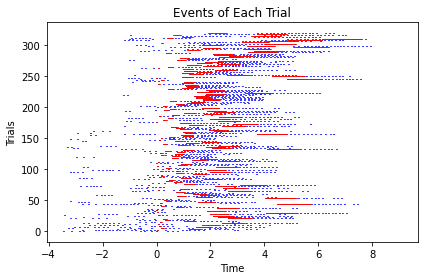

In [69]:
plt.figure()
plt.eventplot([trial['time_by_wait_start'].tolist() for _, trial in licks], colors='b')
plt.eventplot([trial['time_by_wait_start'].tolist() for _, trial in pumps], colors='r')
plt.xlabel('Time')
plt.ylabel('Trials')
plt.title('Events of Each Trial')
plt.tight_layout()
plt.show()

/var/folders/jf/_0n_zq0x43xgvnjkfyzxmpm40000gn/T/ipykernel_98292/941675650.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  licks['time_by_wait'] = licks['time_by_wait'].apply(lambda x: [x] if isinstance(x, (float, int)) else x)
/var/folders/jf/_0n_zq0x43xgvnjkfyzxmpm40000gn/T/ipykernel_98292/941675650.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumps['time_by_wait'] = pumps['time_by_wait'].apply(lambda x: [x] if isinstance(x, (float, int)) else x)


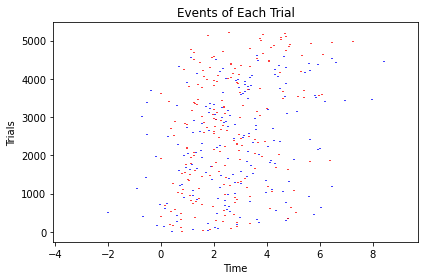

In [41]:
processed_session = utils.load_processed_session(data_folder, dir_name, file_name)

def calculate_time_by_wait(group):
    # Ensure that the groupby operation produces a DataFrame with 'time_by_wait' and other columns
    wait_start_time = group.loc[(group['key'] == 'wait') & (group['value'] == 1), 'trial_time'].iloc[0]
    group['time_by_wait'] = group['trial_time'] - wait_start_time
    return group

# Group by 'session_trial_num' and apply the calculate_time_by_wait function
processed_session = processed_session.groupby('session_trial_num', group_keys=True).apply(calculate_time_by_wait)

# Filter data for licks and pumps
licks = processed_session.loc[(processed_session['key'] == 'lick') & (processed_session['value'] == 1)]
pumps = processed_session.loc[(processed_session['key'] == 'pump') & (processed_session['value'] == 1)]

# Convert 'time_by_wait' column to lists, handling single float values
licks['time_by_wait'] = licks['time_by_wait'].apply(lambda x: [x] if isinstance(x, (float, int)) else x)
pumps['time_by_wait'] = pumps['time_by_wait'].apply(lambda x: [x] if isinstance(x, (float, int)) else x)

# Plot the event data
plt.figure()
plt.eventplot(licks['time_by_wait'].tolist(), colors='b')
plt.eventplot(pumps['time_by_wait'].tolist(), colors='r')
plt.xlabel('Time')
plt.ylabel('Trials')
plt.title('Events of Each Trial')
plt.tight_layout()
plt.show()

In [30]:
licks.get_group(12)

AttributeError: 'DataFrame' object has no attribute 'get_group'

In [31]:
processed_session

session_time  block_num  session_trial_num  \
session_trial_num                                                     
0.0               2      1.685640e+09        0.0                0.0   
                  3      1.685640e+09        0.0                0.0   
                  4      1.685640e+09        0.0                0.0   
                  5      1.685640e+09        0.0                0.0   
                  6      1.685640e+09        0.0                0.0   
...                               ...        ...                ...   
321.0             22229  1.685642e+09        1.0              321.0   
                  22230  1.685642e+09        1.0              321.0   
                  22231  1.685642e+09        1.0              321.0   
                  22232  1.685642e+09        1.0              321.0   
                  22233  1.685643e+09        1.0              321.0   

                         block_trial_num             state  time_bg  \
session_trial_num                                                     
0.0               2                  0.0              None      3.5   
                  3                  0.0     in_background      3.5   
                  4                  0.0     in_background      NaN   
                  5                  0.0     in_background      NaN   
                  6                  0.0     in_background      NaN   
...                                  ...               ...      ...   
321.0             22229            158.0     in_background      1.0   
                  22230            158.0     in_background      NaN   
                  22231            158.0     in_background      NaN   
                  22232            158.0     in_background      1.0   
                  22233            158.0  trial_transition      1.0   

                         reward_size  value         key  trial_time  \
session_trial_num                                                     
0.0               2              NaN      1       trial    0.000000   
                  3              NaN      1  background    0.000084   
                  4              NaN      1      visual    0.007220   
                  5              NaN      1        lick    0.076821   
                  6              NaN      0        lick    0.148685   
...                              ...    ...         ...         ...   
321.0             22229          NaN      1  background    0.000090   
                  22230          NaN      1      visual    0.007159   
                  22231          NaN      0      visual    1.007125   
                  22232          NaN      1        wait    1.007260   
                  22233          NaN      0       trial   11.007278   

                         time_by_wait  
session_trial_num                      
0.0               2         -3.506905  
                  3         -3.506821  
                  4         -3.499685  
                  5         -3.430084  
                  6         -3.358220  
...                               ...  
321.0             22229     -1.007170  
                  22230     -1.000102  
                  22231     -0.000135  
                  22232      0.000000  
                  22233     10.000018  

[22232 rows x 11 columns]

In [35]:
total_trial_num = 321
processed_session_test = processed_session.loc[processed_session.session_trial_num <= total_trial_num]

In [36]:
processed_session_test

,session_time,block_num,session_trial_num,block_trial_num,state,time_bg,reward_size,value,key
0,1.685640e+09,-1.0,-1.0,-1.0,None,None,NaN,1,session
1,1.685640e+09,-1.0,-1.0,-1.0,None,None,NaN,1,block
2,1.685640e+09,0.0,0.0,0.0,None,3.5,NaN,1,trial
3,1.685640e+09,0.0,0.0,0.0,in_background,3.5,NaN,1,background
4,1.685640e+09,0.0,0.0,0.0,in_background,NaN,NaN,1,visual
...,...,...,...,...,...,...,...,...,...
22229,1.685642e+09,1.0,321.0,158.0,in_background,1.0,NaN,1,background
22230,1.685642e+09,1.0,321.0,158.0,in_background,NaN,NaN,1,visual
22231,1.685642e+09,1.0,321.0,158.0,in_background,NaN,NaN,0,visual
22232,1.685642e+09,1.0,321.0,158.0,in_background,1.0,NaN,1,wait


In [38]:
grouped = processed_session_test.groupby('session_trial_num')

In [ ]:
df = pd.DataFrame(data)
df['time_stamp'] = pd.to_datetime(df['time_stamp'])  # Convert time_stamp to datetime type

grouped = df.groupby('trial_number')

plt.figure(figsize=(10, 6))
plt.eventplot([group['time_stamp'].tolist() for _, group in grouped], linelengths=0.5, colors='b')
plt.xlabel('Time')
plt.ylabel('Trials')
plt.title('Events of Each Trial')
plt.tight_layout()
plt.show()

In [40]:
grouped.get_group(1)

,session_time,block_num,session_trial_num,block_trial_num,state,time_bg,reward_size,value,key
34,1.685640e+09,0.0,1.0,1.0,trial_transition,3.4,NaN,1,trial
35,1.685640e+09,0.0,1.0,1.0,in_background,3.4,NaN,1,background
36,1.685640e+09,0.0,1.0,1.0,in_background,NaN,NaN,1,visual
37,1.685640e+09,0.0,1.0,1.0,in_background,NaN,NaN,1,lick
38,1.685640e+09,0.0,1.0,1.0,in_background,NaN,NaN,0,lick
...,...,...,...,...,...,...,...,...,...
90,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,0,lick
91,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,1,lick
92,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,0,lick
93,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,1,lick
